In [197]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
from acquire import get_titanic_data
from prepare import clean_titanic
from env import host,db,protocol,password,user,mysqlcon

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import acquire
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

What is your baseline prediction? 
Majority of the people on the ship died

What is your baseline accuracy? 
Baseline Accuracy: 61.62%

remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [93]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [172]:
df['baseline_prediction'] = 0

In [178]:
baseline_accuracy = (df.baseline_prediction == df.survived).mean()
baseline_accuracy
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 61.62%


In [173]:
pd.crosstab(df.survived, df.baseline_prediction)


baseline_prediction,0
survived,
0,549
1,342


In [174]:
confusion_matrix(df.survived, df.baseline_prediction,
                 labels = (1,0))


array([[  0, 342],
       [  0, 549]])

Prepartion

In [2]:
df = get_titanic_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [4]:
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
#clean up columns name
clean_titanic(df)

,survived,pclass,age,sibling_spouse,parch,fare,alone,sex_male,embark_town_queenstown,embark_town_southampton,embark_town_southhampton
0,0,3,22.000000,1,0,7.2500,0,1,0,1,0
1,1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,1,0
3,1,1,35.000000,1,0,53.1000,0,0,0,1,0
4,0,3,35.000000,0,0,8.0500,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,1,0,1,0
887,1,1,19.000000,0,0,30.0000,1,0,0,1,0
888,0,3,29.699118,1,2,23.4500,0,0,0,1,0
889,1,1,26.000000,0,0,30.0000,1,1,0,0,0


In [8]:
df = clean_titanic(df)

In [13]:
df.columns

Index(['survived', 'pclass', 'age', 'sibling_spouse', 'parch', 'fare', 'alone',
       'sex_male', 'embark_town_queenstown', 'embark_town_southampton',
       'embark_town_southhampton'],
      dtype='object')

Exploration

Object Description Purpose
df Dataframe, Features and target New features, additional cleaning needed, etc.
X_train Dataframe, Features Feature selection, fit models, make predictions
y_train Series, Target Feature selection, evaluate model predictions
X_validate Dataframe, Features Make predictions using top models
y_validate Series, Target Evaluate model predictions made from X_validate to assess overfitting
X_test Dataframe, Features Make predictions using best model
y_test Series, Target Evaluate model predictions made from X_test to estimate future performance on new data


In [14]:
train_val, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df['survived'])
train, validate = train_test_split(train_val, train_size=0.7, random_state=1349, stratify=train_val['survived'])

In [15]:
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

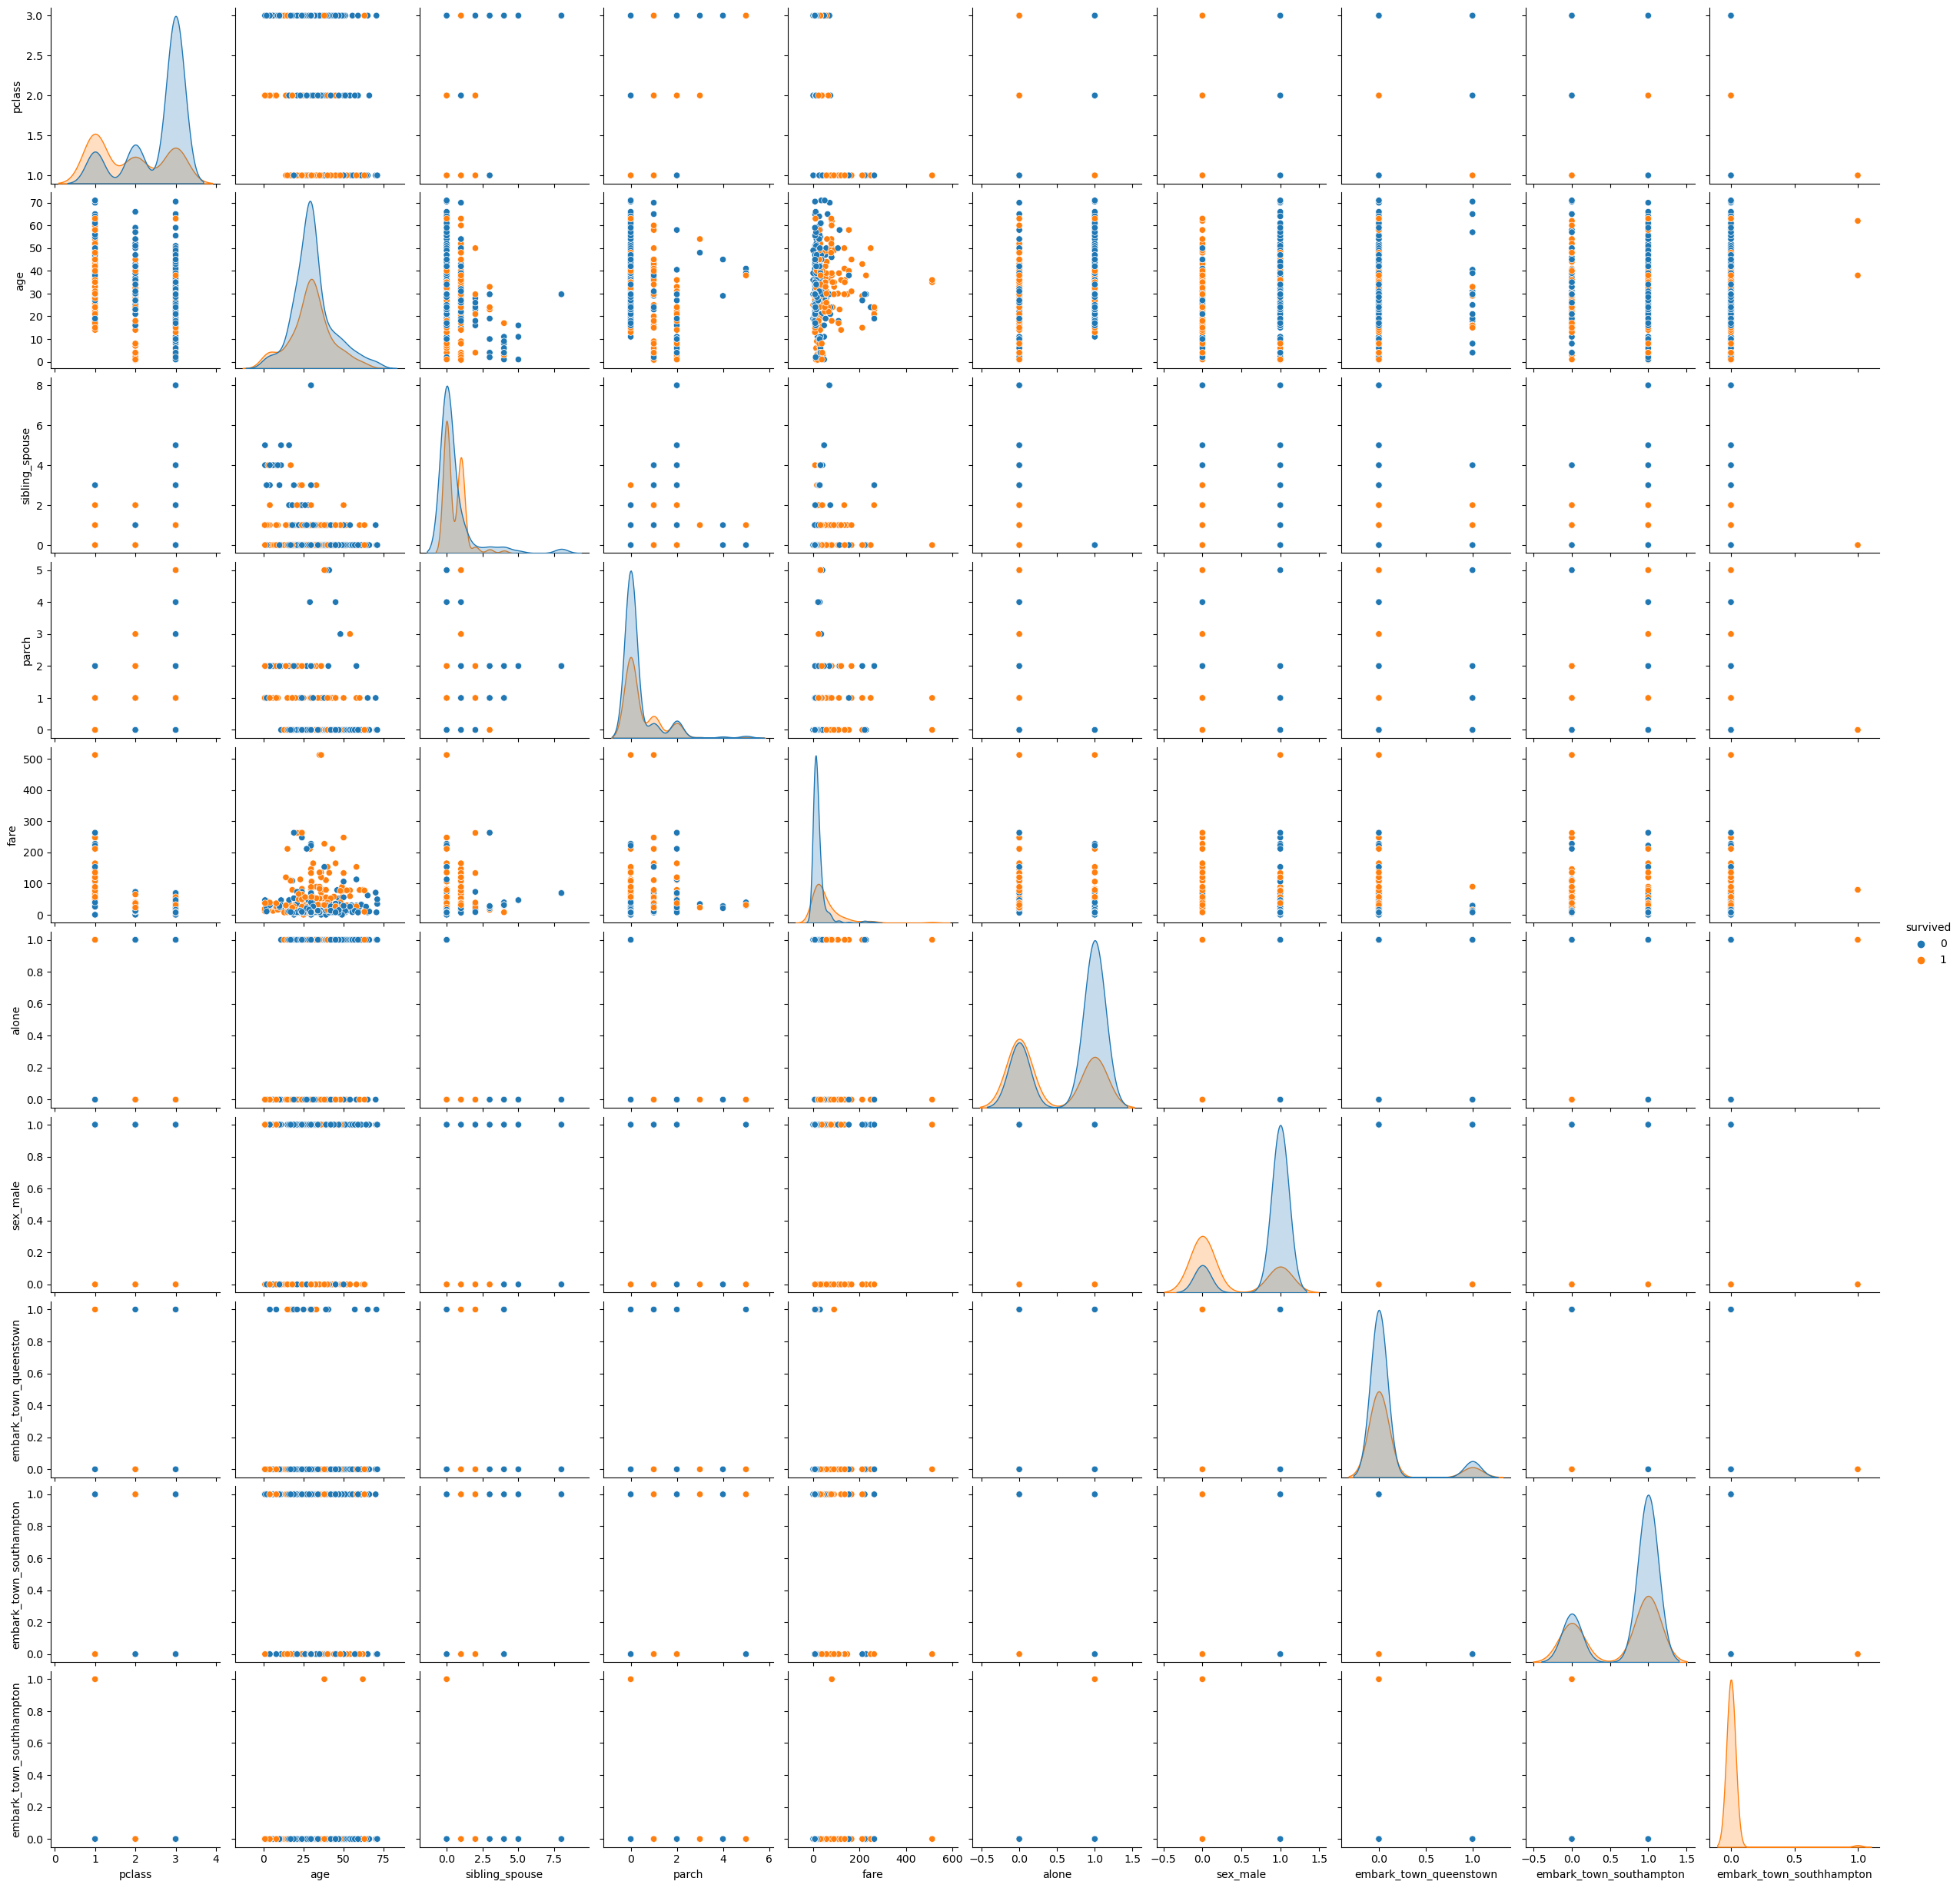

In [16]:
sns.pairplot(train, hue='survived')

In [ ]:
#Cursory takeaways here:
#pclass, age, sibling_spouse,parch,fare
#alone,sex_male,embark_town_queenstown,
#embark_town_southampton

In [ ]:
Modeling

In [63]:
X_cols = train.columns.to_list()
Y_cols = 'survived'

In [64]:
#drop survived from X_cols:
X_cols.remove('survived')

In [65]:
X_cols

['pclass',
 'age',
 'sibling_spouse',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_queenstown',
 'embark_town_southampton',
 'embark_town_southhampton']

In [66]:
Y_cols

'survived'

In [67]:
train[X_cols]

,pclass,age,sibling_spouse,parch,fare,alone,sex_male,embark_town_queenstown,embark_town_southampton,embark_town_southhampton
474,3,22.000000,0,0,9.8375,1,0,0,1,0
370,1,25.000000,1,0,55.4417,0,1,0,0,0
573,3,29.699118,0,0,7.7500,1,0,1,0,0
110,1,47.000000,0,0,52.0000,1,1,0,1,0
167,3,45.000000,1,4,27.9000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
735,3,28.500000,0,0,16.1000,1,1,0,1,0
163,3,17.000000,0,0,8.6625,1,1,0,1,0
770,3,24.000000,0,0,9.5000,1,1,0,1,0
196,3,29.699118,0,0,7.7500,1,1,1,0,0


In [68]:
train[Y_cols]

474    0
370    1
573    1
110    0
167    0
      ..
735    0
163    0
770    0
196    0
94     0
Name: survived, Length: 498, dtype: int64

In [69]:
train[Y_cols].head(4)

474    0
370    1
573    1
110    0
Name: survived, dtype: int64

In [70]:
train[X_cols].head(4)

,pclass,age,sibling_spouse,parch,fare,alone,sex_male,embark_town_queenstown,embark_town_southampton,embark_town_southhampton
474,3,22.000000,0,0,9.8375,1,0,0,1,0
370,1,25.000000,1,0,55.4417,0,1,0,0,0
573,3,29.699118,0,0,7.7500,1,0,1,0,0
110,1,47.000000,0,0,52.0000,1,1,0,1,0


Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [226]:
#make the thing
clf = DecisionTreeClassifier(max_depth=2)

In [227]:
clf

DecisionTreeClassifier(max_depth=2)

In [228]:
#fit the thing
#clf.fit not assinged to any variable 
#clf.fit changes the object itself
#which means it is ready to use. 
clf.fit(train[X_cols], train[Y_cols])

DecisionTreeClassifier(max_depth=2)

In [229]:
#use the thing
model_i_preds = clf.predict(train[X_cols])

In [207]:
#lets make a second model
#before we start talking about scores
# make the thing

clf1 = DecisionTreeClassifier(max_depth=2)
#fit
clf1.fit(train[X_cols], train[Y_cols])
#use the thing
model_2_preds = clf1.predict(train[X_cols])

In [293]:
#train accuracy score
clf.score(train[X_cols],train[Y_cols])

0.8172690763052208

In [294]:
#train accuracy score
clf1.score(train[X_cols],train[Y_cols])

0.7931726907630522

In [78]:
#lets make a third model
# make the thing

clf2 = DecisionTreeClassifier(max_depth=2)
#fit
clf2.fit(train[X_cols], train[Y_cols])
#use the thing
model_3_preds = clf2.predict(train[X_cols])

In [79]:
clf2.score(train[X_cols],train[Y_cols])

0.8012048192771084

In [80]:
print(export_text(clf,feature_names=X_cols))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 22.00
|   |   |   |--- age <= 27.50
|   |   |   |   |--- fare <= 17.43
|   |   |   |   |   |--- alone <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- alone >  0.50
|   |   |   |   |   |   |--- age <= 20.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  20.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  17.43
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  27.50
|   |   |   |   |--- class: 1
|   |   |--- fare >  22.00
|   |   |   |--- age <= 49.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  49.50
|   |   |   |   |--- age <= 50.50
|   |   |   |   |   |--- alone <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- alone >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  50.50
|   |   |   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 23.35
|   |   |   |--- age <= 3

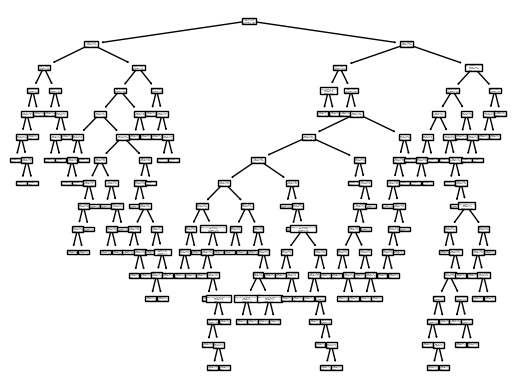

In [83]:
plot_tree(clf,feature_names=X_cols)
plt.show()

In [81]:
print(export_text(clf1,feature_names=X_cols))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- class: 0
|--- sex_male >  0.50
|   |--- fare <= 26.27
|   |   |--- class: 0
|   |--- fare >  26.27
|   |   |--- class: 0



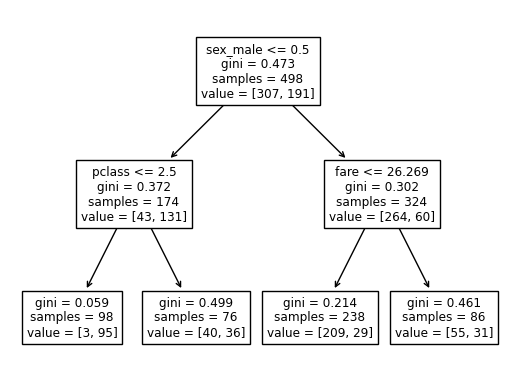

In [84]:
plot_tree(clf1,feature_names=X_cols)
plt.show()

In [82]:
print(export_text(clf2,feature_names=X_cols))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- class: 0
|--- sex_male >  0.50
|   |--- fare <= 26.27
|   |   |--- class: 0
|   |--- fare >  26.27
|   |   |--- class: 0



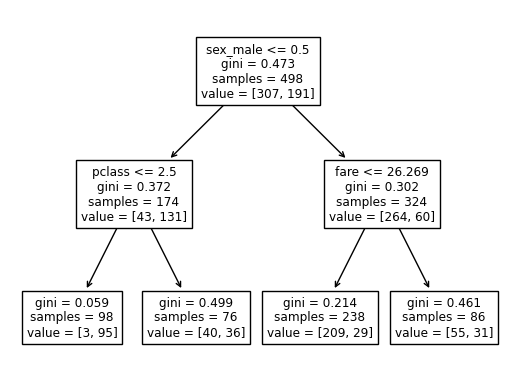

In [86]:
plot_tree(clf2,feature_names=X_cols)
plt.show()

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [185]:
clf.score(train[X_cols],train[Y_cols])

0.9839357429718876

In [184]:
clf1.score(train[X_cols],train[Y_cols])

0.8012048192771084

In [183]:
clf2.score(train[X_cols],train[Y_cols])

0.8012048192771084

In [187]:
#accuracy score using model 3 
accuracy_score(train[Y_cols], model_3_preds)

0.8012048192771084

In [189]:
confusion_matrix(train[Y_cols], model_3_preds)

array([[304,   3],
       [ 96,  95]])

In [297]:
confusion_matrix(train[Y_cols], model_2_preds)

array([[264,  43],
       [ 60, 131]])

In [296]:
confusion_matrix(train[Y_cols], model_i_preds)

array([[304,   3],
       [ 96,  95]])

In [295]:
confusion_matrix(train[Y_cols], model_i_preds,
                 labels = (0,1))


array([[304,   3],
       [ 96,  95]])

In [195]:
pd.crosstab(train[Y_cols],model_i_preds )

col_0,0,1
survived,,
0,306,1
1,7,184


Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
###

Run through steps 2-4 using a different max_depth value.

In [301]:
model_dict={}
for i in range(2,15):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(train[X_cols], train[Y_cols])
    model_dict[f'dt_depth']
    clf.score(train[X_cols],train[Y_cols])
    clf.score(validate[X_cols],validate[Y_cols])
    



KeyError: 'dt_depth'

In [208]:
#lets make a second model
#before we start talking about scores
# make the thing

clf1 = DecisionTreeClassifier(max_depth=1)
#fit
clf1.fit(train[X_cols], train[Y_cols])
#use the thing
model_2_preds = clf1.predict(train[X_cols])

In [205]:
clf1.score(train[X_cols],train[Y_cols])

0.7931726907630522

Which model performs better on your in-sample data?

In [238]:
model_i_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [239]:
accuracy_score(train[Y_cols], model_i_preds)

0.8012048192771084

In [231]:
X_val, Y_val, = validate[X_cols], validate[Y_cols]

In [232]:
clf.score(X_val,Y_val)

0.7616822429906542

Which model performs best on your out-of-sample data, the validate set?
clf and clf2

In [237]:
clf.score(X_val,Y_val)

0.7616822429906542

In [235]:
clf1.score(X_val,Y_val)

0.7429906542056075

In [236]:
clf2.score(X_val,Y_val)

0.7616822429906542

In [ ]:
######### Random Forest ########

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [244]:
from sklearn.ensemble import RandomForestClassifier

# make the thing
rf = RandomForestClassifier(min_samples_leaf=1,
                            max_depth=10,
                            random_state=1349)
# fit the thing
# remember only ever call fit on train data!!
# !!
rf.fit(train[X_cols], train[Y_cols])
# use the thing!
rf_0_preds = rf.predict(train[X_cols])
rf.score(train[X_cols], train[Y_cols])

0.9578313253012049

In [246]:
rf.score(X_val, Y_val)

0.7850467289719626

Evaluate your results using the model score, confusion matrix, and classification report.

In [247]:
conf_rf = confusion_matrix(train[Y_cols], rf_0_preds)

In [249]:
conf_rf

array([[304,   3],
       [ 18, 173]])

In [252]:
pd.DataFrame(
    classification_report(
        train[Y_cols],
        rf_0_preds,
        output_dict=True) )

,0,1,accuracy,macro avg,weighted avg
precision,0.944099,0.982955,0.957831,0.963527,0.959002
recall,0.990228,0.905759,0.957831,0.947994,0.957831
f1-score,0.966614,0.942779,0.957831,0.954696,0.957472
support,307.000000,191.000000,0.957831,498.000000,498.000000


Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [254]:
conf_rf.ravel()
TN, FP, FN, TP = conf_rf.ravel()

In [255]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
support_0 = train[train.survived == 0].shape[0]
support_1 = train[train.survived == 1].shape[0]

In [256]:
accuracy, TPR, FPR, TNR, FNR, precision, recall, f1, support_0, support_1

(0.9578313253012049,
 0.9057591623036649,
 0.009771986970684038,
 0.990228013029316,
 0.09424083769633508,
 0.9829545454545454,
 0.9057591623036649,
 0.9427792915531334,
 307,
 191)

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [257]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [258]:
list(range(10,1, -1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]

In [259]:
[pair for pair in zip(range(1,10), range(10,1,-1))]

[(1, 10), (2, 9), (3, 8), (4, 7), (5, 6), (6, 5), (7, 4), (8, 3), (9, 2)]

In [264]:
# I perhaps would do the same thing I did before with a loop!
rf_model_dict = {}
for i in [pair for pair in zip(range(1,10), 
                                range(10,1,-1))]:
    clf = RandomForestClassifier(min_samples_leaf=i[0],
                                 max_depth=i[1])
    clf.fit(train[X_cols], train[Y_cols])
    # make a dictionary inside of my model_dictionary
    rf_model_dict[f'rf_{i[0]}'] =  {}
    # in the sub-dictionary:
    # assign the model object
    rf_model_dict[f'rf_{i[0]}']['model'] = clf
    #assign the train score
    rf_model_dict[f'rf_{i[0]}']['train_score'] = \
    clf.score(train[X_cols], train[Y_cols])
    # assign the validate score
    rf_model_dict[f'rf_{i[0]}']['val_score'] = \
    clf.score(X_val, Y_val)
    # assign the validation dropoff
    rf_model_dict[f'rf_{i[0]}']['val_diff'] = \
    clf.score(train[X_cols], train[Y_cols]) - clf.score(X_val, Y_val)

In [265]:
rf_model_dict

{'rf_1': {'model': RandomForestClassifier(max_depth=10),
  'train_score': 0.963855421686747,
  'val_score': 0.7850467289719626,
  'val_diff': 0.1788086927147844},
 'rf_2': {'model': RandomForestClassifier(max_depth=9, min_samples_leaf=2),
  'train_score': 0.9136546184738956,
  'val_score': 0.7990654205607477,
  'val_diff': 0.11458919791314792},
 'rf_3': {'model': RandomForestClassifier(max_depth=8, min_samples_leaf=3),
  'train_score': 0.891566265060241,
  'val_score': 0.7990654205607477,
  'val_diff': 0.09250084449949325},
 'rf_4': {'model': RandomForestClassifier(max_depth=7, min_samples_leaf=4),
  'train_score': 0.8815261044176707,
  'val_score': 0.8037383177570093,
  'val_diff': 0.07778778666066133},
 'rf_5': {'model': RandomForestClassifier(max_depth=6, min_samples_leaf=5),
  'train_score': 0.8674698795180723,
  'val_score': 0.7897196261682243,
  'val_diff': 0.07775025334984798},
 'rf_6': {'model': RandomForestClassifier(max_depth=5, min_samples_leaf=6),
  'train_score': 0.8694779

In [266]:
max_score = 0
for model in rf_model_dict:
    if rf_model_dict[model]['val_score'] > max_score:
        max_score = rf_model_dict[model]['val_score']
        model_name = model

In [267]:
max_score

0.8037383177570093

In [268]:
model

'rf_9'

In [270]:
rf_model_dict['rf_9']['model']

RandomForestClassifier(max_depth=2, min_samples_leaf=9)

In [271]:
len([0 for i in range(0, validate.shape[0])])

214

In [273]:
# Prediction DataFrame!
pred_df = pd.DataFrame(
    {
        'baseline': [0 for i in range(
        0, validate.shape[0])],
        'y_true': Y_val.values
    }
)

In [274]:
for model in rf_model_dict:
    model_preds = rf_model_dict[model]['model'].predict(X_val)
    pred_df[model] = model_preds

In [275]:
pred_df

,baseline,y_true,rf_1,rf_2,rf_3,rf_4,rf_5,rf_6,rf_7,rf_8,rf_9
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,0,0,0,0,0,0,0,0,0
210,0,1,1,1,1,1,1,1,1,1,1
211,0,1,1,1,1,1,1,1,1,1,1
212,0,0,0,0,0,0,0,0,0,0,0


In [276]:
rf_model_dict.keys()

dict_keys(['rf_1', 'rf_2', 'rf_3', 'rf_4', 'rf_5', 'rf_6', 'rf_7', 'rf_8', 'rf_9'])

In [277]:
rf_model_dict['rf_1'].keys()

dict_keys(['model', 'train_score', 'val_score', 'val_diff'])

In [278]:
[rf_model_dict[model]['train_score'] 
 for model in rf_model_dict]

[0.963855421686747,
 0.9136546184738956,
 0.891566265060241,
 0.8815261044176707,
 0.8674698795180723,
 0.8694779116465864,
 0.8514056224899599,
 0.8453815261044176,
 0.8172690763052208]

In [280]:
accuracy_df = pd.DataFrame(
 {
     'model':[model for model in rf_model_dict],
     'train_accuracy':[rf_model_dict[model]['train_score'] for model in rf_model_dict],
     'val_accuracy': [rf_model_dict[model]['val_score'] for model in rf_model_dict],
     'diff': [rf_model_dict[model]['val_diff'] for model in rf_model_dict]
 }
)

In [281]:
accuracy_df

,model,train_accuracy,val_accuracy,diff
0,rf_1,0.963855,0.785047,0.178809
1,rf_2,0.913655,0.799065,0.114589
2,rf_3,0.891566,0.799065,0.092501
3,rf_4,0.881526,0.803738,0.077788
4,rf_5,0.867470,0.789720,0.077750
5,rf_6,0.869478,0.771028,0.098450
6,rf_7,0.851406,0.771028,0.080378
7,rf_8,0.845382,0.761682,0.083699
8,rf_9,0.817269,0.733645,0.083624


In [285]:
accuracy_df.set_index(accuracy_df.index + 1).plot(title='performance over depth of RF', figsize=(20,15))

<AxesSubplot:title={'center':'performance over depth of RF'}>

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [286]:
model_name

'rf_4'

In [287]:
rf_model_dict['rf_4']

{'model': RandomForestClassifier(max_depth=7, min_samples_leaf=4),
 'train_score': 0.8815261044176707,
 'val_score': 0.8037383177570093,
 'val_diff': 0.07778778666066133}

In [288]:
# Let's presume this is indeed our best model, since
# it tends to perform the best on validate set

In [289]:
test_preds = rf_model_dict['rf_4']['model'].predict(
    test[X_cols])
test_score = rf_model_dict['rf_4']['model'].score(
    test[X_cols],test[Y_cols])

In [290]:
test_score

0.8100558659217877